# matplotlibの使い方

``matplotlib``の使い方を確認します。
また``pandas.DataFrame.plot``と組み合わせた使い方も確認します。

# 参考サイト

1. [SciKit Learn: The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
2. [matplotlib: The Lifecycle of a Plot](https://matplotlib.org/stable/tutorials/lifecycle.html)
3. [matplotlib: Quick start guide](https://matplotlib.org/stable/users/explain/quick_start.html)
4. [matplotlib: APIs](https://matplotlib.org/stable/users/explain/figure/api_interfaces.html)

## モジュールのインポート

 利用するモジュールのバージョンを確認します。

In [2]:
import matplotlib as mpl
import pandas as pd

print(f"Pandas: {pd.__version__}")
print(f"Matplotlib: {mpl.__version__}")

Pandas: 2.2.0
Matplotlib: 3.8.3


## カラーマップ名の確認

- 利用可能なカラーマップ名は``matplotlib.colormaps``で確認できます。
- カラーマップ名は170種類あります。

In [ ]:
# mpl.colormaps()
# len(mpl.colormaps()) # 170

# 散布図を作成する

``matplotlib.axes.Axes.scatter``と``pandas.DataFrame.plot``を使った方法で散布図を作成します。

## 散布図を作成する（``Axes.scatter``）

- サンプルデータに``scikit-learn``に付属しているアヤメのデータを使っています。
- プロットに日本語フォントを利用するため``japanize_matplotlib``をインポートしています。
- オプジェクト指向スタイル（``OO-style``）でプロットを作成しています。

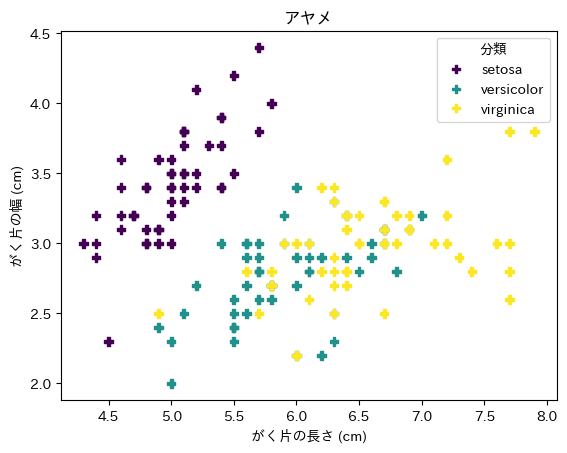

In [10]:
from sklearn import datasets
import matplotlib.pyplot as plt
import japanize_matplotlib  # noqa: F401

# サンプルデータを pd.DataFrame で読み込む
iris = datasets.load_iris(as_frame=True)

# Figure, Axesオブジェクトを作成する
_, ax = plt.subplots()

# 散布図を作成する
scatter = ax.scatter(
    data=iris.frame,
    x="sepal length (cm)",
    y="sepal width (cm)",
    c="target",  # マーカーの色
    marker="P",  # マーカーの形
)
ax.set_xlabel("がく片の長さ (cm)")
ax.set_ylabel("がく片の幅 (cm)")
ax.set_title("アヤメ")
_ = ax.legend(
    scatter.legend_elements()[0],
    iris.target_names,
    loc="upper right",
    title="分類",
)

## 散布図を作成する（``pd.DataFrame.plot``）

- ``Axes.scatter``で作成した図と同様のものを``pandas.DataFrame.plot``で作成しました。
- ひとつのプロットを作成する場合``plt.subplots()``は不要です。
- オプションを利用して、プロットの見た目も一括で設定できます。

<Axes: title={'center': 'アヤメ'}, xlabel='がく片の長さ (cm)', ylabel='がく片の幅 (cm)'>

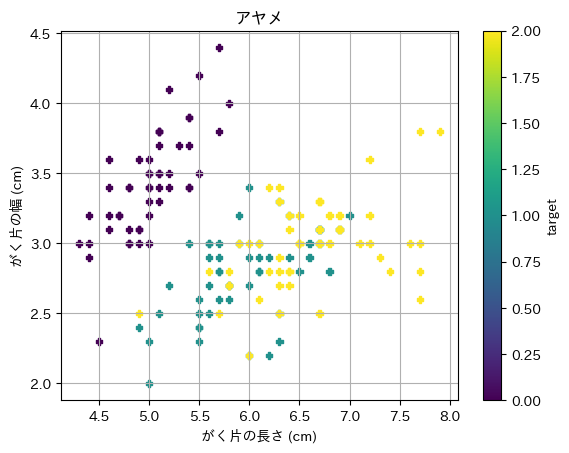

In [14]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris(as_frame=True)

# _, axs = plt.subplots()

iris.frame.plot(
    kind="scatter",
    x="sepal length (cm)",
    y="sepal width (cm)",
    c="target",
    marker="P",
    title="アヤメ",
    xlabel="がく片の長さ (cm)",
    ylabel="がく片の幅 (cm)",
    grid=True,
    cmap="viridis",
)

# キャンバスを分割したい（``matplotlib.pyplot.subplots``）

- [matplotlib.pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
- ``plt.subplots``を使って、キャンバスを（2行1列に）分割しています。
- ``pandas.DataFrame.plot``の``ax``オプションを使って、どの場所に描画するか指定しています。

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

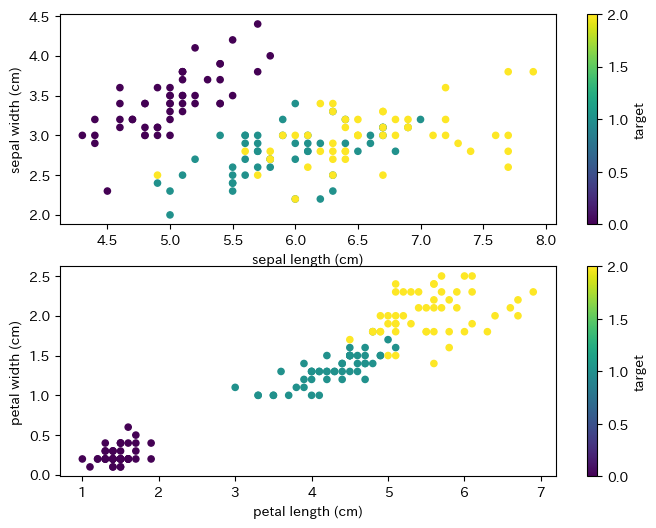

In [15]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris(as_frame=True)
_, axs = plt.subplots(2, 1, figsize=(8, 6))

# 上段
iris.frame.plot(
    kind="scatter",
    x="sepal length (cm)",
    y="sepal width (cm)",
    c="target",
    ax=axs[0],
    cmap="viridis",
)

# 下段
iris.frame.plot(
    kind="scatter",
    x="petal length (cm)",
    y="petal width (cm)",
    c="target",
    ax=axs[1],
    cmap="viridis",
)

# キャンバスをもっと分割したい（``matplotlib.pyplot.subplot_mosaic``）

- [matplotlib.pyplot.subplot_mosaic](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot_mosaic.html)
- 散布図と、その投影ヒストグラムを作成したい（でもできてない）

<Axes: label='C', xlabel='Frequency'>

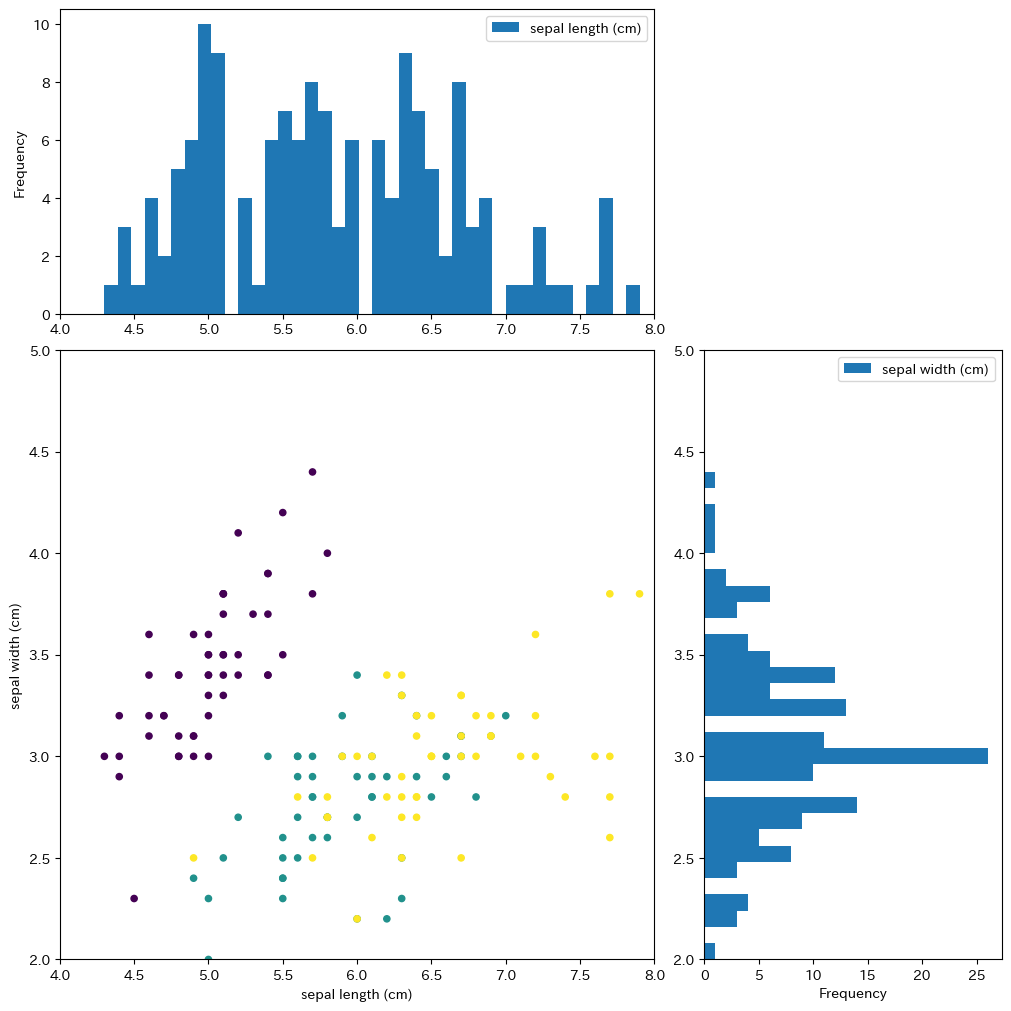

In [97]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris(as_frame=True)

mosaic = [["A", "A", "."], ["B", "B", "C"], ["B", "B", "C"]]

fig, axs = plt.subplot_mosaic(
    mosaic=mosaic,
    layout="constrained",
    figsize=(10, 10),
)

# メイン
limit_x = (4, 8)
limit_y = (2, 5)

iris.frame.plot(
    kind="scatter",
    x="sepal length (cm)",
    y="sepal width (cm)",
    c="target",
    cmap="viridis",
    ax=axs["B"],
    colorbar=False,
    legend=True,
    xlim=limit_x,
    ylim=limit_y,
)

# サブ
names = ["sepal length (cm)"]
iris.frame[names].plot(
    kind="hist",
    xlim=limit_x,
    bins=40,
    ax=axs["A"],
)

# サブ
names = ["sepal width (cm)"]
iris.frame[names].plot(
    kind="hist",
    ax=axs["C"],
    ylim=limit_y,
    bins=30,
    orientation="horizontal",
)